In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
# https://github.com/caiocarneloz/masksemi
from masksemi.masksemi import maskData
# https://www.kaggle.com/semisupervised/semi-supervised-sklearn

from helpers import Trainer, plot_conf_mat, plot_roc, plot_roc_avg, plot_pie_chart, stats_test

random.seed(0)

In [2]:
X_cs_15 = np.load('npy_data/X_combinedSampling_15Features_task1.npy')
y_cs_15 = np.load('npy_data/y_combinedSampling_15Features_task1.npy')
print('X_cs_15.shape, y_cs_15.shape', X_cs_15.shape, y_cs_15.shape)

classes = ['No', '>30', '<30']

X_cs_15.shape, y_cs_15.shape (27209, 15) (27209,)


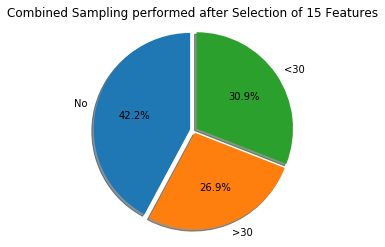

In [3]:
plot_pie_chart(classes, y_cs_15, 15)

In [4]:
kfold = StratifiedKFold(10, random_state=False, shuffle=True)

folds_15 = kfold.split(X_cs_15, y_cs_15)
folds_15 = [(train, test) for train, test in folds_15]

In [5]:
data_classes_15  = []

for i in range(3):
    data_classes_15.append(len(y_cs_15[y_cs_15==i]))
    
cls2clr = {
    0: 'red',
    1: 'green',
    2: 'blue'
}
clf2clr = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'purple',
    4: 'cornflowerblue',
}

In [6]:
trainer = Trainer(X=X_cs_15, y=y_cs_15, folds=folds_15, data_classes=data_classes_15, classes=classes)

----------------15 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         1.1728        |
|    Accuracy   |   0.9700466010549755  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.951475949019277  | 0.975472632580059  | 0.9920964647695971 |
|     Recall     | 0.9872700770353194 | 0.9276161295372709 | 0.9834874499027004 |
|  Specificity   | 0.9632782719186785 | 0.9914015765257307 | 0.9964876915063468 |
|    F1-score    | 0.969028467350979  | 0.9509106624131917 | 0.9877649466445548 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+--------+--------+
|  

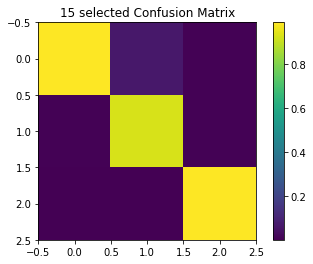

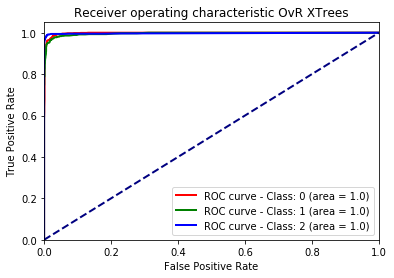

In [7]:
tables, xtrees_metrics_15 = trainer.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(xtrees_metrics_15, data_classes_15, cls2clr, 'XTrees')

### Unlabel Data 

In [8]:
X_ssl_10, y_ssl_10 = X_cs_15, maskData(y_cs_15, 1. - 0.1)
X_ssl_20, y_ssl_20 = X_cs_15, maskData(y_cs_15, 1. - 0.2)
X_ssl_50, y_ssl_50 = X_cs_15, maskData(y_cs_15, 1. - 0.5)
X_ssl_90, y_ssl_90 = X_cs_15, maskData(y_cs_15, 1. - 0.9)
X_ssl_95, y_ssl_95 = X_cs_15, maskData(y_cs_15, 1. - 0.95)

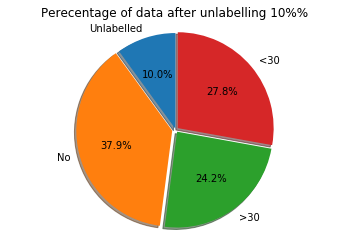

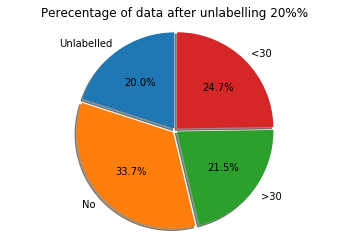

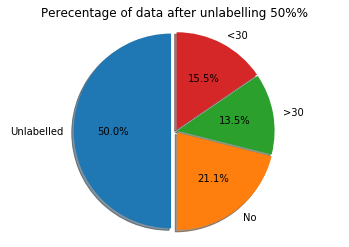

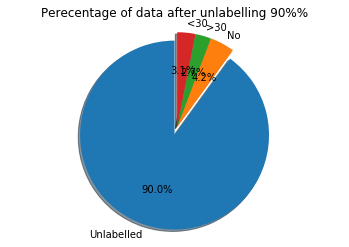

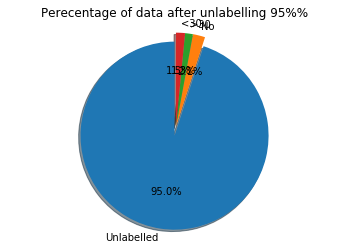

In [9]:
plot_pie_chart(['Unlabelled'] + classes, y_ssl_10, '10%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_20, '20%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_50, '50%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_90, '90%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_95, '95%', 'ssl')

In [ ]:
tables, labelProp_metrics_10 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.1)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 10% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 10%')
plot_roc(labelProp_metrics_10, data_classes_15, cls2clr, 'LabelProp 10%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_20 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.2)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 20% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 20%')
plot_roc(labelProp_metrics_20, data_classes_15, cls2clr, 'LabelProp 20%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_50 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.5)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 50% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 50%')
plot_roc(labelProp_metrics_50, data_classes_15, cls2clr, 'LabelProp 50%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_90 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.9)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 90% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 90%')
plot_roc(labelProp_metrics_90, data_classes_15, cls2clr, 'LabelProp 90%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_95 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.95)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 95% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 95%')
plot_roc(labelProp_metrics_95, data_classes_15, cls2clr, 'LabelProp 95%')

print('-----------------------------------------------------------------------')

In [ ]:
tables, labelSpread_metrics_10 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.1)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 10% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 10%')
plot_roc(labelSpread_metrics_10, data_classes_15, cls2clr, 'LabelSpread 10%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_20 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.2)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 20% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 20%')
plot_roc(labelSpread_metrics_20, data_classes_15, cls2clr, 'LabelSpread 20%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_50 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.5)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 50% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 50%')
plot_roc(labelSpread_metrics_50, data_classes_15, cls2clr, 'LabelSpread 50%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_90 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.9)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 90% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 90%')
plot_roc(labelSpread_metrics_90, data_classes_15, cls2clr, 'LabelSpread 90%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_95 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.95)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 95% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 95%')
plot_roc(labelSpread_metrics_95, data_classes_15, cls2clr, 'LabelSpread 95%')

print('-----------------------------------------------------------------------')

In [ ]:
tables, selftrain_metrics_10 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.1)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 10% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 10%')
plot_roc(selftrain_metrics_10, data_classes_15, cls2clr, 'SelfTrain 10%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_20 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.2)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 20% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 20%')
plot_roc(selftrain_metrics_20, data_classes_15, cls2clr, 'SelfTrain 20%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_50 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.5)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 50% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 50%')
plot_roc(selftrain_metrics_50, data_classes_15, cls2clr, 'SelfTrain 50%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_90 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.9)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 90% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 90%')
plot_roc(selftrain_metrics_90, data_classes_15, cls2clr, 'SelfTrain 90%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_95 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.95)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 95% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 95%')
plot_roc(selftrain_metrics_95, data_classes_15, cls2clr, 'SelfTrain 95%')

print('-----------------------------------------------------------------------')